# METAR Data Analysis Project

METAR is the acronym for Meteorological Aerodrome Report. It is internationally recognized shorthand for weather data used by the aviation community.

Different abbreviations and codes from US Government National Weather Service: [source](https://www.weather.gov/media/wrh/mesowest/metar_decode_key.pdf)

### The Problem:

A Flight school is looking to expand to new locations. You're given METAR data to identify the 10 best and 10 worst locations based on the following criteria:

* Visibility of 10 statute miles or greater 

* Cloud ceiling of 3,000 ft above ground or higher

* Winds less than 15 kts

----

### Imports and Reading in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

metar = '../data/metar_export.txt'

col_names = ['date', 'id', 'obsv_time', 'automated', 'wind_speed', 'visibility', 'cloud_cover', \
            'temp_dewpt', 'altimeter', 'altimeter_remarks', 'ao2']

df = pd.read_csv(metar, delimiter=' ', header = None, names = col_names)

df.head()

,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2
0,2015-03-25,21:15:00\tKCXP,252115Z,AUTO,08005KT,10SM,CLR,17/M01,A3033,RMK,AO2
1,2015-03-25,21:13:00\tKWRB,252113Z,AUTO,06005KT,10SM,BKN014,OVC024,20/17,A3009,RMK
2,2015-03-25,21:12:00\tKTUL,252112Z,14006KT,10SM,TS,BKN035,BKN120,BKN250,24/16,A2975
3,2015-03-25,21:11:00\tKDRT,252111Z,AUTO,13007KT,10SM,SCT023,22/17,A2986,RMK,AO2
4,2015-03-25,21:10:00\tKBRL,252110Z,AUTO,33009KT,8SM,SCT016,07/03,A3006,RMK,AO2


In [8]:
df['id'].str.split(pat = '\t', expand = True)

,0,1
0,21:15:00,KCXP
1,21:13:00,KWRB
2,21:12:00,KTUL
3,21:11:00,KDRT
4,21:10:00,KBRL
...,...,...
7731236,18:16:00,KWRI
7731237,18:15:00,KUES
7731238,18:14:00,KVPS
7731239,18:13:00,KRCA


In [7]:
help(pd.Series.str.split)

Help on function split in module pandas.core.strings.accessor:

split(self, pat=None, n=-1, expand=False)
    Split strings around given separator/delimiter.
    
    Splits the string in the Series/Index from the beginning,
    at the specified delimiter string. Equivalent to :meth:`str.split`.
    
    Parameters
    ----------
    pat : str, optional
        String or regular expression to split on.
        If not specified, split on whitespace.
    n : int, default -1 (all)
        Limit number of splits in output.
        ``None``, 0 and -1 will be interpreted as return all splits.
    expand : bool, default False
        Expand the split strings into separate columns.
    
        * If ``True``, return DataFrame/MultiIndex expanding dimensionality.
        * If ``False``, return Series/Index, containing lists of strings.
    
    Returns
    -------
    Series, Index, DataFrame or MultiIndex
        Type matches caller unless ``expand=True`` (see Notes).
    
    See Also
    ---

In [3]:
df['time'], df['id'] = df['id'].str.split('\t', 1).str

# Check after using the .str.split
assert len(df['time']) == len(df['id'])

print(f'Column names: {df.columns}')
cols = df.columns
df.head()

/var/folders/tk/_pf80lmx2y3d3h54nxcs8_j40000gn/T/ipykernel_60189/1257623105.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['time'], df['id'] = df['id'].str.split('\t', 1).str


Column names: Index(['date', 'id', 'obsv_time', 'automated', 'wind_speed', 'visibility',
       'cloud_cover', 'temp_dewpt', 'altimeter', 'altimeter_remarks', 'ao2',
       'time'],
      dtype='object')


,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2,time
0,2015-03-25,KCXP,252115Z,AUTO,08005KT,10SM,CLR,17/M01,A3033,RMK,AO2,21:15:00
1,2015-03-25,KWRB,252113Z,AUTO,06005KT,10SM,BKN014,OVC024,20/17,A3009,RMK,21:13:00
2,2015-03-25,KTUL,252112Z,14006KT,10SM,TS,BKN035,BKN120,BKN250,24/16,A2975,21:12:00
3,2015-03-25,KDRT,252111Z,AUTO,13007KT,10SM,SCT023,22/17,A2986,RMK,AO2,21:11:00
4,2015-03-25,KBRL,252110Z,AUTO,33009KT,8SM,SCT016,07/03,A3006,RMK,AO2,21:10:00


In [4]:
# print(cols[:-1])
print(f'Last column: {cols[-1:]}')

col_list = list(cols)

print(f'Columns before rearranging: {col_list}')

time = col_list.pop()

col_list.insert(0, time)

print(f'Columns after rearranging: {col_list}')

Last column: Index(['time'], dtype='object')
Columns before rearranging: ['date', 'id', 'obsv_time', 'automated', 'wind_speed', 'visibility', 'cloud_cover', 'temp_dewpt', 'altimeter', 'altimeter_remarks', 'ao2', 'time']
Columns after rearranging: ['time', 'date', 'id', 'obsv_time', 'automated', 'wind_speed', 'visibility', 'cloud_cover', 'temp_dewpt', 'altimeter', 'altimeter_remarks', 'ao2']


---
Columns are now in the desired order, we'll rearrange the dataframe to have the columns in this order.

---

In [5]:
df = df[col_list].copy()
df.head()

,time,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2
0,21:15:00,2015-03-25,KCXP,252115Z,AUTO,08005KT,10SM,CLR,17/M01,A3033,RMK,AO2
1,21:13:00,2015-03-25,KWRB,252113Z,AUTO,06005KT,10SM,BKN014,OVC024,20/17,A3009,RMK
2,21:12:00,2015-03-25,KTUL,252112Z,14006KT,10SM,TS,BKN035,BKN120,BKN250,24/16,A2975
3,21:11:00,2015-03-25,KDRT,252111Z,AUTO,13007KT,10SM,SCT023,22/17,A2986,RMK,AO2
4,21:10:00,2015-03-25,KBRL,252110Z,AUTO,33009KT,8SM,SCT016,07/03,A3006,RMK,AO2


There is an issue with the `automated` and `wind_speed` columns. Let's see the breakdown of observations that were automated recordings and which ones were not.

In [6]:
auto = 0
not_auto = 0

for i in df['automated']:
    if i == 'AUTO':
        auto += 1
    elif i != 'AUTO':
        not_auto += 1
    else:
        continue

print(f'Num. of Automated: {auto}')
print(f'Num. of Non-Automated: {not_auto}')
print(f'% Automated: {round(auto / len(df), 2)}')
print(f'% Non-Automated: {round(not_auto / len(df), 2)}')

Num. of Automated: 4361474
Num. of Non-Automated: 3369767
% Automated: 0.56
% Non-Automated: 0.44


---

## Data Manipulation

Too many observations in `df['automated']` to throw out observations that `!= 'AUTO'`

From here, `df` will be split into two separate dataframes based on the values in the `automated` column, selecting only the columns of interest to answer the problem, and then concatenated into a single dataframe.

Concatenation makes more sense than a merge because the columns will be the same in both dataframes and we aren't joining the data on a particular column or index.

In [8]:
df.head()

,time,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2
0,21:15:00,2015-03-25,KCXP,252115Z,AUTO,08005KT,10SM,CLR,17/M01,A3033,RMK,AO2
1,21:13:00,2015-03-25,KWRB,252113Z,AUTO,06005KT,10SM,BKN014,OVC024,20/17,A3009,RMK
2,21:12:00,2015-03-25,KTUL,252112Z,14006KT,10SM,TS,BKN035,BKN120,BKN250,24/16,A2975
3,21:11:00,2015-03-25,KDRT,252111Z,AUTO,13007KT,10SM,SCT023,22/17,A2986,RMK,AO2
4,21:10:00,2015-03-25,KBRL,252110Z,AUTO,33009KT,8SM,SCT016,07/03,A3006,RMK,AO2


In [9]:
df_auto = df[df['automated'] == 'AUTO'].copy()

print(f'Shape of df_auto: {df_auto.shape}')

df_auto.head()

Shape of df_auto: (4361474, 12)


,time,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2
0,21:15:00,2015-03-25,KCXP,252115Z,AUTO,08005KT,10SM,CLR,17/M01,A3033,RMK,AO2
1,21:13:00,2015-03-25,KWRB,252113Z,AUTO,06005KT,10SM,BKN014,OVC024,20/17,A3009,RMK
3,21:11:00,2015-03-25,KDRT,252111Z,AUTO,13007KT,10SM,SCT023,22/17,A2986,RMK,AO2
4,21:10:00,2015-03-25,KBRL,252110Z,AUTO,33009KT,8SM,SCT016,07/03,A3006,RMK,AO2
5,21:10:00,2015-03-25,KCMX,252110Z,AUTO,26016KT,4SM,-SN,BR,OVC007,01/M01,A2959


In [21]:
# df_auto = df_auto[['date', 'id', 'wind_speed', 'visibility', 'cloud_cover']]

# df_auto.head()

In [22]:
df_non_auto = df[df['automated'] != 'AUTO'].copy()

df_non_auto.head()

,time,date,id,obsv_time,automated,wind_speed,visibility,cloud_cover,temp_dewpt,altimeter,altimeter_remarks,ao2
2,21:12:00,2015-03-25,KTUL,252112Z,14006KT,10SM,TS,BKN035,BKN120,BKN250,24/16,A2975
7,21:10:00,2015-03-25,KSZL,252110Z,03009KT,9SM,-RA,VCTS,SCT040,BKN100,10/07,A3000
9,21:09:00,2015-03-25,KGCK,252109Z,01029G38KT,10SM,BKN018,BKN033,BKN080,07/02,A3008,RMK
10,21:09:00,2015-03-25,KGSP,252109Z,02009KT,7SM,FEW011,SCT021,OVC041,16/13,A3015,RMK
15,21:07:00,2015-03-25,KSFO,252107Z,29014KT,10SM,FEW200,21/12,A3020,RMK,AO2,WSHFT


In [28]:
df_non_auto = df_non_auto[['date', 'id', 'automated', 'wind_speed', 'visibility']]

df_non_auto.head()

,date,id,automated,wind_speed,visibility
2,2015-03-25,KTUL,14006KT,10SM,TS
7,2015-03-25,KSZL,03009KT,9SM,-RA
9,2015-03-25,KGCK,01029G38KT,10SM,BKN018
10,2015-03-25,KGSP,02009KT,7SM,FEW011
15,2015-03-25,KSFO,29014KT,10SM,FEW200


In [29]:
print(df_auto.columns)

len(df_auto.columns)

Index(['date', 'id', 'wind_speed', 'visibility', 'cloud_cover'], dtype='object')


5

In [30]:
df_non_auto

,date,id,automated,wind_speed,visibility
2,2015-03-25,KTUL,14006KT,10SM,TS
7,2015-03-25,KSZL,03009KT,9SM,-RA
9,2015-03-25,KGCK,01029G38KT,10SM,BKN018
10,2015-03-25,KGSP,02009KT,7SM,FEW011
15,2015-03-25,KSFO,29014KT,10SM,FEW200
...,...,...,...,...,...
7731234,2016-04-28,KMFD,06006KT,10SM,OVC005
7731235,2016-04-28,KCRP,13013KT,7SM,SCT012
7731237,2016-04-28,KUES,07012G16KT,10SM,OVC008
7731238,2016-04-28,KVPS,20011KT,10SM,BKN012


In [31]:
df_non_auto.columns = df_auto.columns

df_non_auto.head()

,date,id,wind_speed,visibility,cloud_cover
2,2015-03-25,KTUL,14006KT,10SM,TS
7,2015-03-25,KSZL,03009KT,9SM,-RA
9,2015-03-25,KGCK,01029G38KT,10SM,BKN018
10,2015-03-25,KGSP,02009KT,7SM,FEW011
15,2015-03-25,KSFO,29014KT,10SM,FEW200


In [32]:
all_dfs = pd.concat([df_auto, df_non_auto])

In [33]:
all_dfs.head()

,date,id,wind_speed,visibility,cloud_cover
0,2015-03-25,KCXP,08005KT,10SM,CLR
1,2015-03-25,KWRB,06005KT,10SM,BKN014
3,2015-03-25,KDRT,13007KT,10SM,SCT023
4,2015-03-25,KBRL,33009KT,8SM,SCT016
5,2015-03-25,KCMX,26016KT,4SM,-SN


In [34]:
assert len(all_dfs) == len(df), "Not the same"

In [27]:
all_dfs.tail()

,date,id,wind_speed,visibility,cloud_cover
7731234,2016-04-28,KMFD,06006KT,10SM,OVC005
7731235,2016-04-28,KCRP,13013KT,7SM,SCT012
7731237,2016-04-28,KUES,07012G16KT,10SM,OVC008
7731238,2016-04-28,KVPS,20011KT,10SM,BKN012
7731240,2016-04-28,KMSN,07010KT,10SM,OVC016


In [28]:
all_dfs.id.value_counts(normalize = True)

KCOD    0.002448
KFKL    0.002447
KSGU    0.002445
KHYS    0.002445
KJHW    0.002444
          ...   
KRYY    0.000822
KISM    0.000800
KTIX    0.000734
KBVI    0.000556
KQQY    0.000540
Name: id, Length: 702, dtype: float64

In [29]:
all_dfs['id'].nunique()

702

Columns of interest are: 

- id
- wind_speed
- visibility
- cloud cover

Need to parse out KT for wind_speed, SM for visibility, and make conditions for cloud_cover

In [30]:
all_dfs['cloud_cover'].nunique()

13000

In [31]:
all_dfs.dtypes

date           object
id             object
wind_speed     object
visibility     object
cloud_cover    object
dtype: object

In [36]:
all_dfs['visibility'] = all_dfs['visibility'].str.strip('SM')
#all_dfs.drop(columns = ['visibiloity'], inplace = True)
all_dfs.head(20)

,date,id,wind_speed,visibility,cloud_cover
0,2015-03-25,KCXP,08005KT,10,CLR
1,2015-03-25,KWRB,06005KT,10,BKN014
3,2015-03-25,KDRT,13007KT,10,SCT023
4,2015-03-25,KBRL,33009KT,8,SCT016
5,2015-03-25,KCMX,26016KT,4,-SN
6,2015-03-25,KINL,29018G26KT,1,3/4SM
8,2015-03-25,KSKA,20011KT,9,OVC006
11,2015-03-25,KALI,16011KT,10,FEW020
12,2015-03-25,KDLF,17008KT,10,BKN026
13,2015-03-25,KFRI,03020G27KT,10,-RA


In [37]:
all_dfs['id'].str[1:].head()

0    CXP
1    WRB
3    DRT
4    BRL
5    CMX
Name: id, dtype: object

In [36]:
airport_codes = all_dfs['id'].unique()

print(len(airport_codes))

702


In [37]:
type(airport_codes)

numpy.ndarray

In [38]:
airport_codes = pd.DataFrame(airport_codes)

airport_codes.head()

,0
0,KCXP
1,KWRB
2,KDRT
3,KBRL
4,KCMX


In [42]:
all_dfs.head()

,date,id,wind_speed,visibility,cloud_cover
0,2015-03-25,KCXP,08005KT,10,CLR
1,2015-03-25,KWRB,06005KT,10,BKN014
3,2015-03-25,KDRT,13007KT,10,SCT023
4,2015-03-25,KBRL,33009KT,8,SCT016
5,2015-03-25,KCMX,26016KT,4,-SN


In [43]:
all_dfs.reset_index(inplace = True)

print(all_dfs.shape)

all_dfs.head()

del all_dfs['index']

print(all_dfs.shape)

all_dfs.head()

(7731241, 6)
(7731241, 5)


,date,id,wind_speed,visibility,cloud_cover
0,2015-03-25,KCXP,08005KT,10,CLR
1,2015-03-25,KWRB,06005KT,10,BKN014
2,2015-03-25,KDRT,13007KT,10,SCT023
3,2015-03-25,KBRL,33009KT,8,SCT016
4,2015-03-25,KCMX,26016KT,4,-SN


In [44]:
all_dfs.tail()

,date,id,wind_speed,visibility,cloud_cover
7731236,2016-04-28,KMFD,06006KT,10,OVC005
7731237,2016-04-28,KCRP,13013KT,7,SCT012
7731238,2016-04-28,KUES,07012G16KT,10,OVC008
7731239,2016-04-28,KVPS,20011KT,10,BKN012
7731240,2016-04-28,KMSN,07010KT,10,OVC016


### Wind_speed:

- first three digits are true direction in degrees
- next two digits are sustained speed
- if gusts are present, next two digits are max wind speed in past few minutes

Split 00KT from rest then drop? Then split 00 and KT and drop KT?

Regular expressions that would pull out relevant numbers

import re
^ check that out on pandas

In [45]:
all_dfs['wind_speed'].head()

0    08005KT
1    06005KT
2    13007KT
3    33009KT
4    26016KT
Name: wind_speed, dtype: object

In [46]:
all_dfs.dtypes

date           object
id             object
wind_speed     object
visibility     object
cloud_cover    object
dtype: object

---

Trying a single airport first. then seeing if can be iterated.
---

### KMFD

In [47]:
kmfd = all_dfs[all_dfs['id'] == 'KMFD']

kmfd.head()

,date,id,wind_speed,visibility,cloud_cover
2703,2015-03-26,KMFD,22006KT,9,CLR
3263,2015-03-26,KMFD,23004KT,8,CLR
3887,2015-03-26,KMFD,25005KT,7,CLR
4537,2015-03-26,KMFD,24004KT,6,BR
4741,2015-03-26,KMFD,32005KT,4,BR


In [48]:
len(kmfd)

10737

In [50]:
pd.to_datetime(kmfd['date'])

2703      2015-03-26
3263      2015-03-26
3887      2015-03-26
4537      2015-03-26
4741      2015-03-26
             ...    
7729826   2016-04-28
7729860   2016-04-28
7730670   2016-04-28
7731132   2016-04-28
7731236   2016-04-28
Name: date, Length: 10737, dtype: datetime64[ns]

In [51]:
kmfd['date'].unique()

array(['2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
       '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
       '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-07',
       '2015-04-08', '2015-04-09', '2015-04-11', '2015-04-13',
       '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-19',
       '2015-04-20', '2015-04-21', '2015-04-22', '2015-04-23',
       '2015-04-26', '2015-04-27', '2015-04-28', '2015-04-29',
       '2015-04-30', '2015-05-01', '2015-05-02', '2015-05-04',
       '2015-05-05', '2015-05-06', '2015-05-07', '2015-05-08',
       '2015-05-10', '2015-05-11', '2015-05-12', '2015-05-13',
       '2015-05-15', '2015-05-16', '2015-05-17', '2015-05-18',
       '2015-05-19', '2015-05-20', '2015-05-21', '2015-05-22',
       '2015-05-23', '2015-05-24', '2015-05-25', '2015-05-26',
       '2015-05-27', '2015-05-28', '2015-05-29', '2015-05-30',
       '2015-05-31', '2015-06-02', '2015-06-03', '2015-06-04',
       '2015-06-05', '2015-06-08', '2015-06-09', '2015-

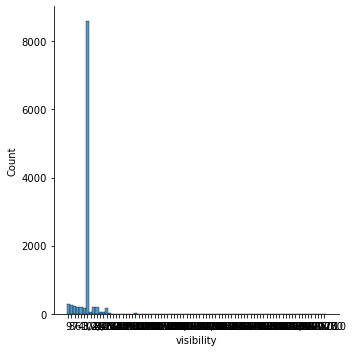

In [53]:
sns.displot(data = kmfd, x = 'visibility')

In [54]:
kmfd.visibility.value_counts()

10         8593
9           278
8           252
7           225
5           209
           ... 
28004KT       1
250V330       1
200V270       1
230V310       1
300V010       1
Name: visibility, Length: 81, dtype: int64

In [37]:
pct_clr = len(all_dfs[all_dfs['cloud_cover'] == 'CLR'])

print(pct_clr)

3246810


In [38]:
clr = round(
pct_clr / len(all_dfs), 4
)*100

print(f"Clear Skies: {clr}%")

Clear Skies: 42.0%


### Cloud_cover:

- CLEAR = sky clear
- FEW = 0-2 eighths
- SCT = scattered 3-4 eighths
- BKN = Broken - 5-7 eighths
- OVC = Overcast - 8 eighths

cloud cover, thinking rules based approach eg:

- clear = 5
- few = 4
- sct = 3
- bkn = 2
- else: 1



almost binary outcome

what proportions of days can you fly

then rank on proportion of flying days

In [54]:
all_dfs['id'].unique()

array(['KCXP', 'KWRB', 'KDRT', 'KBRL', 'KCMX', 'KINL', 'KSKA', 'KALI',
       'KDLF', 'KFRI', 'KHQM', 'KAFF', 'KDNL', 'KAST', 'KLBX', 'KTRM',
       'KDAN', 'KDAA', 'KADW', 'KBAB', 'KBAD', 'KBIF', 'KBIX', 'KCBM',
       'KCEF', 'KCOF', 'KDMA', 'KDYS', 'KFAF', 'KFBG', 'KFHU', 'KFSI',
       'KFTK', 'KGRF', 'KGRK', 'KGTB', 'KHMN', 'KHRT', 'KHST', 'KIAB',
       'KINS', 'KLFI', 'KLSF', 'KLSV', 'KLUF', 'KMCF', 'KMIB', 'KMUI',
       'KMXF', 'KOFF', 'KPAM', 'KPOB', 'KQGX', 'KRCA', 'KRDR', 'KRIV',
       'KRND', 'KSKF', 'KSSC', 'KSVN', 'KTCM', 'KTIK', 'KVAD', 'KWRI',
       'KHIB', 'KADF', 'KAND', 'KART', 'KBIH', 'KCEC', 'KCTB', 'KDIK',
       'KDUG', 'KEED', 'KEKO', 'KGFA', 'KINW', 'KJMS', 'KMTW', 'KOFK',
       'KQRH', 'KTPH', 'KUKI', 'KWJF', 'KWMC', 'KMMH', 'KOAJ', 'KONP',
       'KOUN', 'KPEQ', 'KPGV', 'KPNA', 'KPQI', 'KPVW', 'KQQY', 'KQSN',
       'KRKD', 'KRNH', 'KRUT', 'KSDY', 'KSEZ', 'KSGU', 'KSJS', 'KSME',
       'KSMN', 'KSOA', 'KTEX', 'KTVF', 'KVIS', 'KWWR', 'K36U', 'KASN',
      

In [57]:
print(round(len(all_dfs)/ uniques))

11013


11000 observations per station

___